# LINEAR REGRESSION MODEL FROM SCRATCH


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [45]:
data = pd.read_csv("data_for_lr.csv")
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [47]:
data.isnull().sum()

x    0
y    1
dtype: int64

### DATA PROCESSING

In [48]:
data = data.dropna()
print("Shape of the data:", data.shape)

Shape of the data: (699, 2)


### SPLITTING DATA

In [49]:
## training input and output
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.x[0:500]).reshape(500,1)

## validation data input and output
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.x[500:699]).reshape(199,1)

In [50]:
print(f"training data shape = {train_input.shape}")
print(f"training data shape = {train_input.shape}")
print(f"testing data shape = {test_input.shape}")
print(f"testing data shape = {test_input.shape}")

training data shape = (500, 1)
training data shape = (500, 1)
testing data shape = (199, 1)
testing data shape = (199, 1)


# <font color = "lightblue">LINEAR REGRESSION</font>

## Forward Propagation

In [51]:
def forward_propagation(train_input, parameters):
    m = parameters["m"]
    c = parameters["c"]

    predictions = np.multiply(m, train_input) + c
    return predictions

## Cost function

In [52]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions)**2)*0.5
    return cost

## Gradient Descent for Back Propagation

df = summation(f(x) - y)/n

dm = df*x

dc = df*1



In [53]:
def backward_propagation(train_input, train_output, predictions):

    derivatives = dict()

    df = predictions - train_output
    dm = np.mean(np.multiply(df, train_input))
    dc = np.mean(df)

    derivatives["dm"] = dm
    derivatives["dc"] = dc

    return derivatives


## Update Parameters

m = m - (learning_rate * dm)

c = c - (learning_rate * dc)

In [54]:
def update_parameters(parameters, derivatives, learning_rate):

    parameters["m"] = parameters["m"] - learning_rate * derivatives['dm']
    parameters["c"] = parameters["c"] - learning_rate * derivatives['dc']

    return parameters

## Model Training

In [55]:
def train(train_input, train_output, learning_rate, iters):

    # random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1)
    parameters["c"] = np.random.uniform(0,1)

    plt.figure()

    # loss
    loss = list()
    
    # iteration
    for i in range(iters):
        
        # forward propagation
        predictions = forward_propagation(train_input, parameters)

        # cost
        cost = cost_function(predictions, train_output)
        
        loss.append(cost)
        print(f"Iteration = {i+1}, Loss = {cost}")

        #plot
        fig, ax = plt.subplots()

        ax.plot(train_input, train_output, "+", label = "Original")
        ax.plot(train_input, predictions, "*", label = "Training")

        legend = ax.legend()

        plt.plot(train_input, train_output, "+", label = "Original")
        plt.plot(train_input, predictions, "*", label = "Training")
        plt.show()

        # back propagation 
        derivatives = backward_propagation(train_input, train_output, predictions)

        # update the parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)

    return parameters, loss

## Training

Iteration = 1, Loss = 605.1974461035987


<Figure size 640x480 with 0 Axes>

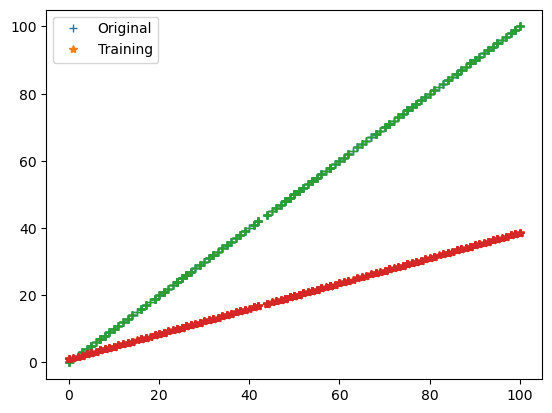

Iteration = 2, Loss = 274.640282980306


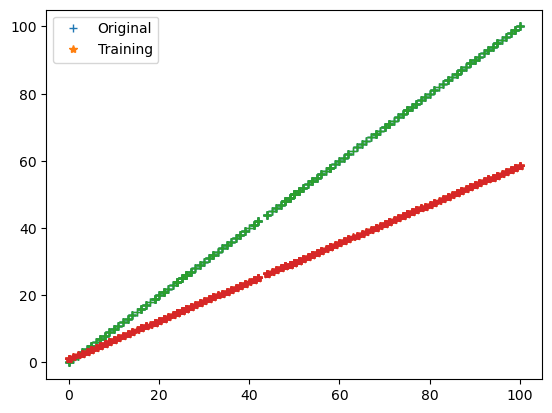

Iteration = 3, Loss = 124.666128832993


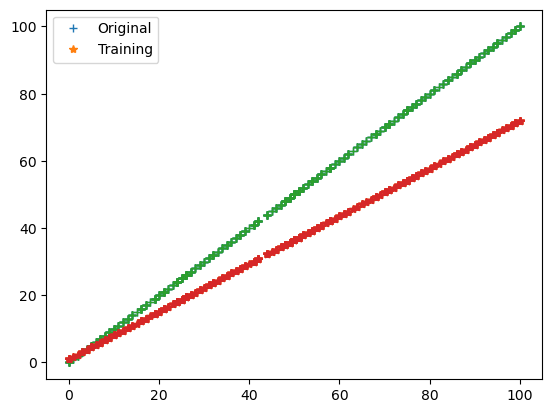

Iteration = 4, Loss = 56.622685879421276


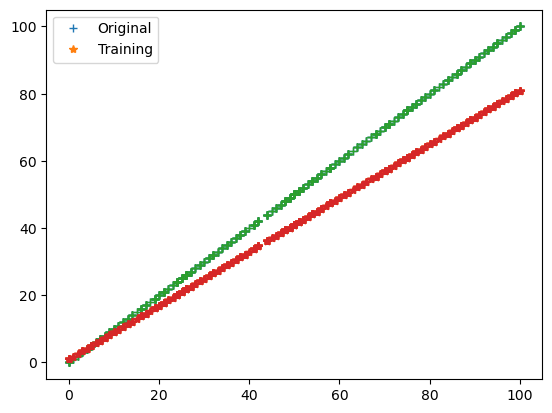

Iteration = 5, Loss = 25.751297344438495


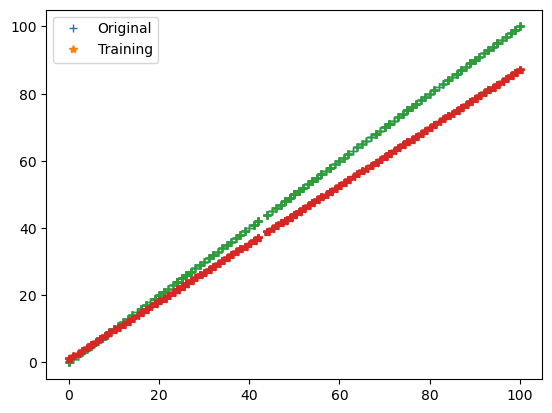

Iteration = 6, Loss = 11.744911072625266


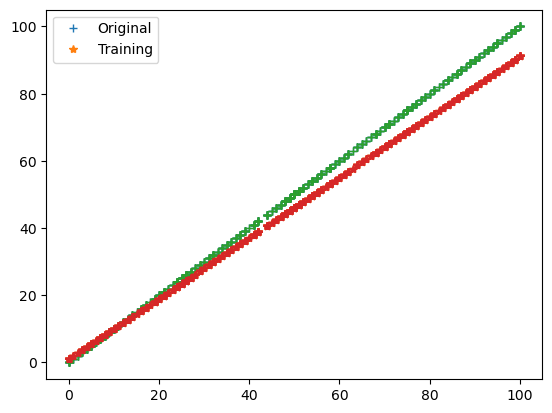

Iteration = 7, Loss = 5.390195008139681


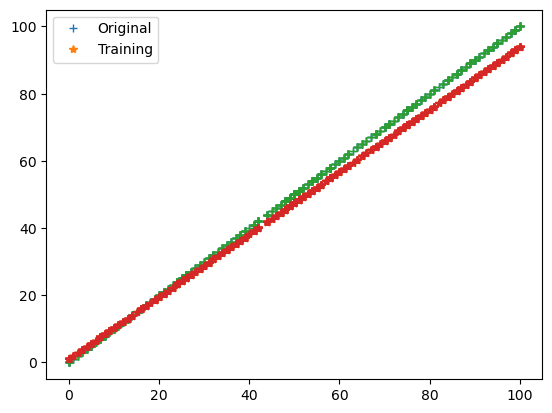

Iteration = 8, Loss = 2.5070501921800417


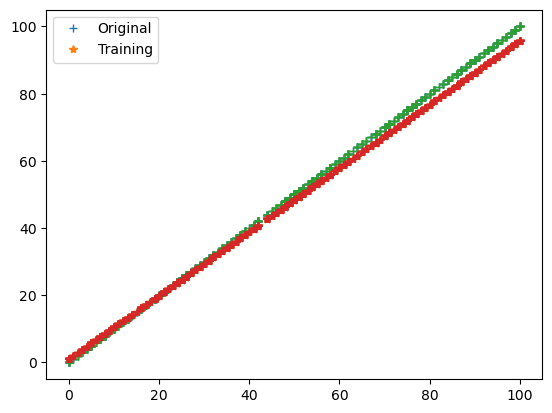

Iteration = 9, Loss = 1.198961097088102


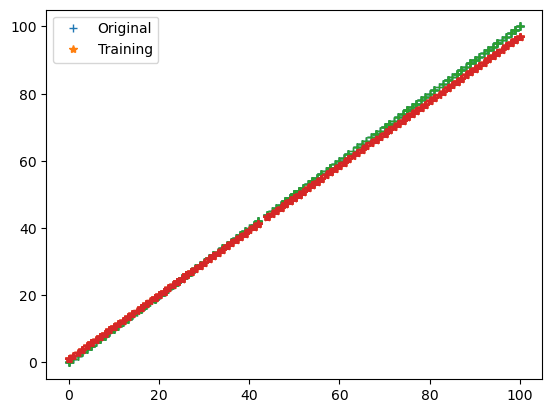

Iteration = 10, Loss = 0.6054765273065689


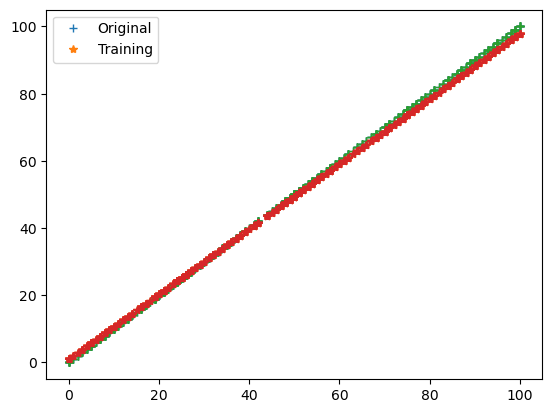

Iteration = 11, Loss = 0.3362088223398606


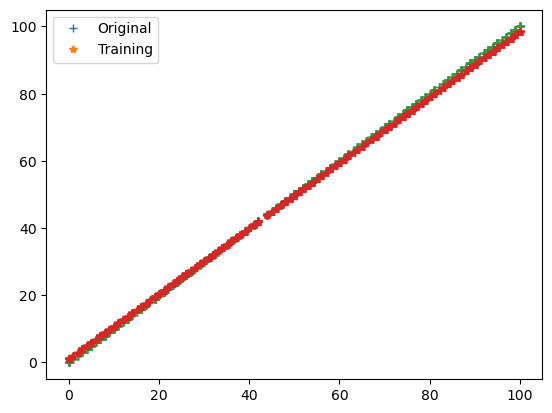

Iteration = 12, Loss = 0.2140386682116754


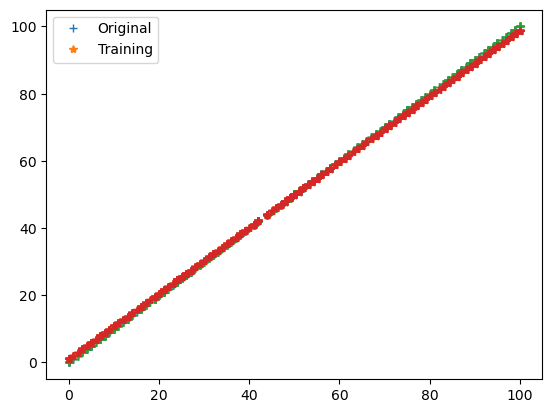

Iteration = 13, Loss = 0.1586068359862977


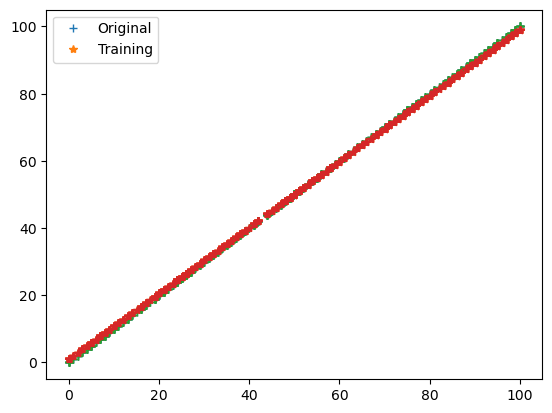

Iteration = 14, Loss = 0.13345425448639894


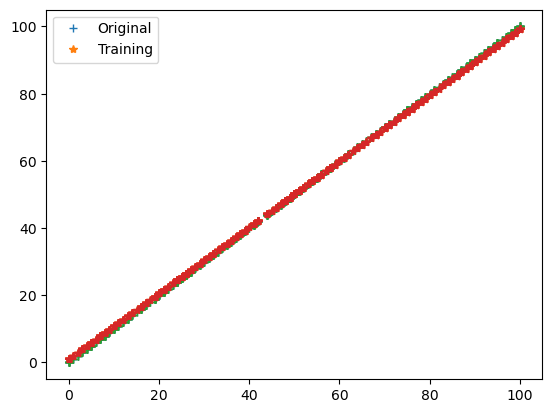

Iteration = 15, Loss = 0.12203940273523992


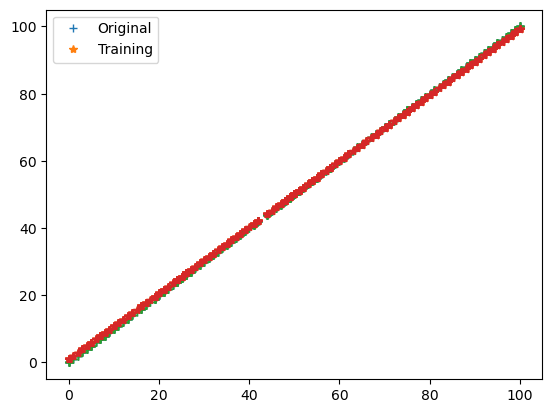

Iteration = 16, Loss = 0.11685737434360313


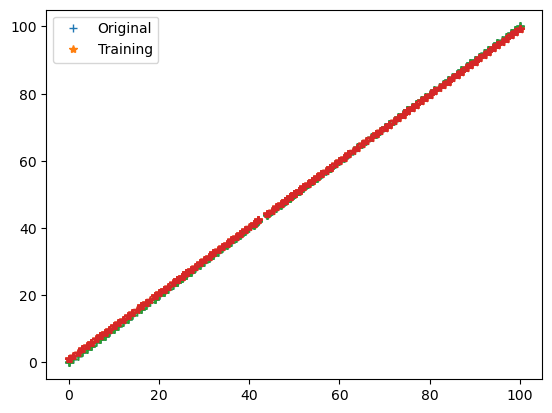

Iteration = 17, Loss = 0.11450318496994262


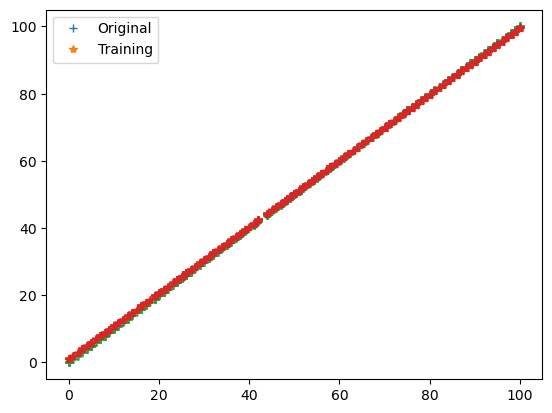

Iteration = 18, Loss = 0.11343198944699427


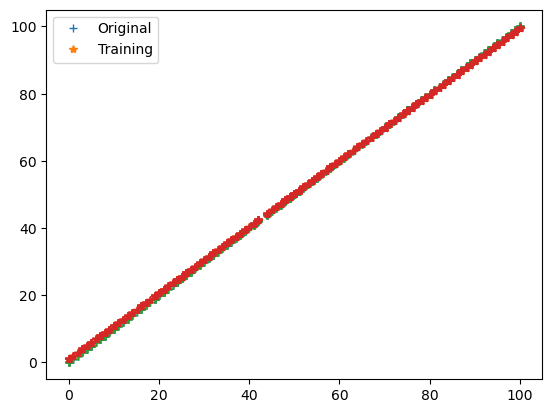

Iteration = 19, Loss = 0.1129428898112254


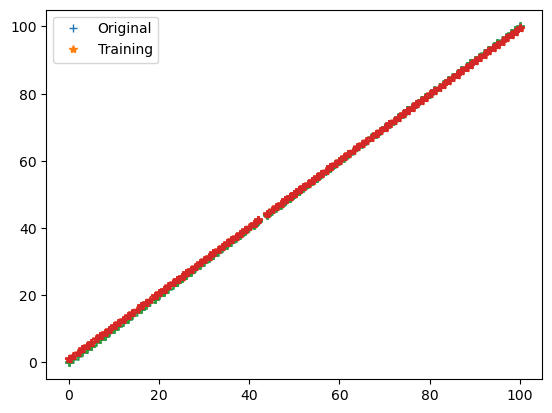

Iteration = 20, Loss = 0.11271788788023332


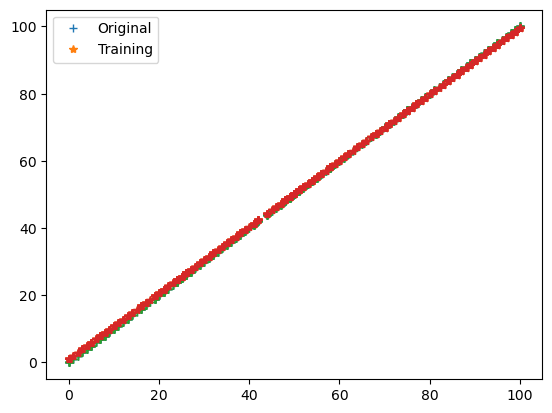

In [63]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [57]:
print(parameters)

{'m': 0.9849806179194942, 'c': 0.9698315541105755}


In [58]:
loss

[1340.0614460774937,
 608.0521468094862,
 275.9387136645163,
 125.25847792087558,
 56.894684801269314,
 25.877952877436464,
 11.805623985434448,
 5.420989517457665,
 2.5242705250326125,
 1.2100226473886806,
 0.6137436674954985,
 0.3432079719280807,
 0.22046236543027,
 0.16476928620604314,
 0.1394980130402772,
 0.12802914714397182,
 0.12282244887821514,
 0.120456903166949,
 0.11938039168089512,
 0.11888871661486426]

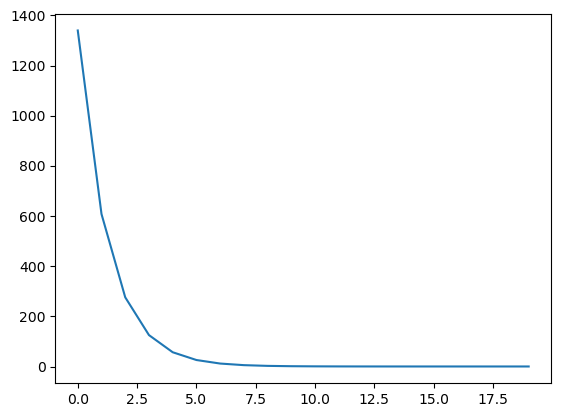

In [59]:
plt.plot(loss)

## Let's Predict

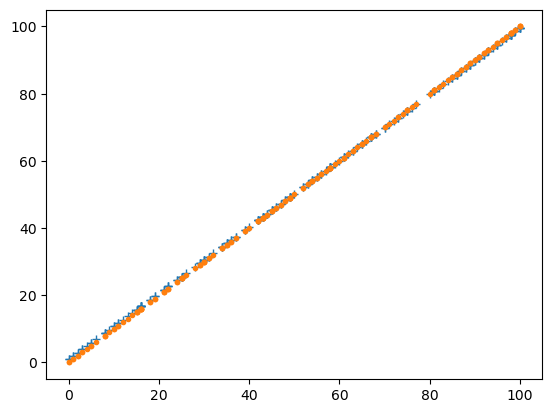

In [64]:
test_predictions = test_input * parameters['m'] + parameters['c']
plt.plot(test_input, test_predictions, "+")
plt.plot(test_input, test_output, ".")
plt.show()

## Cost of Prediction

In [66]:
cost_function(test_output, test_predictions)

0.11131142131063254

# USING SCIKIT LEARN LIBRARY

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lr_model = LinearRegression()

In [69]:
lr_model.fit(train_input, train_output)

LinearRegression()

In [71]:
lr_model.coef_

array([[1.]])

In [72]:
lr_model.intercept_

array([2.13162821e-14])

## Predictions

In [73]:
test_predictions = lr_model.predict(test_input)

Text(0.5, 0, 'Output/Predictions')

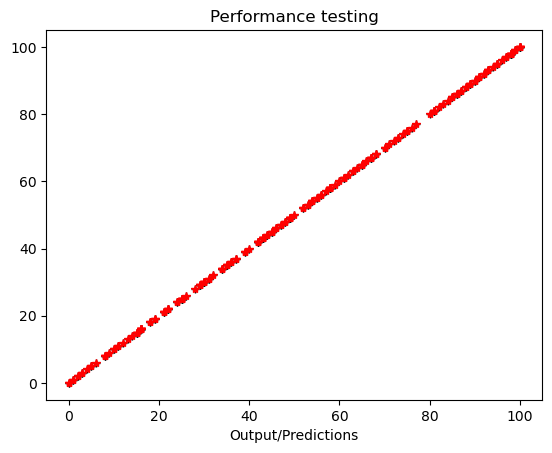

In [77]:
plt.plot(test_input, test_predictions, "+" , color = "black")
plt.plot(test_input, test_output, "*" , color = "red")
plt.title("Performance testing")
plt.xlabel("Input")
plt.xlabel("Output/Predictions")

## Cost

In [78]:
from sklearn.metrics import mean_squared_error

cost = mean_squared_error(test_output, test_predictions)
cost

2.6802242976785453e-28